# **Mice Imputation with Iterative Imputer**

## **Written by:-** Aarish Asif Khan

## **Date:** 23 February 2024

In [60]:
# pip install numpy pandas scikit-learn fancyimpute

In [61]:
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score

In [62]:
# Load the Titanic dataset
df = sns.load_dataset("titanic")

# Print the 5 rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
# Convert non-numeric columns to string data type
non_numeric_columns = titanic_df.select_dtypes(exclude=['number']).columns
titanic_df[non_numeric_columns] = titanic_df[non_numeric_columns].astype(str)

In [64]:
# Handle missing values if any
titanic_df.fillna(titanic_df.mode().iloc[0], inplace=True)

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = titanic_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    titanic_df[column] = label_encoder.fit_transform(titanic_df[column])

In [65]:
# Initialize the MICE imputer
mice_imputer = IterativeImputer()

In [66]:
# Perform imputation
imputed_titanic = mice_imputer.fit_transform(titanic_df)

In [67]:
# Convert the imputed array back to a DataFrame
imputed_titanic_df = pd.DataFrame(imputed_titanic, columns=titanic_df.columns)

# Display the first few rows of the imputed dataset
print(imputed_titanic_df.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  who  \
0       0.0     3.0  1.0  22.0    1.0    0.0   7.2500       2.0  1.0   
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833       0.0  2.0   
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250       2.0  2.0   
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000       2.0  2.0   
4       0.0     3.0  1.0  35.0    0.0    0.0   8.0500       2.0  1.0   

   adult_male  deck  embark_town  alive  alone  class_First  class_Second  \
0         1.0   7.0          2.0    0.0    0.0          0.0           0.0   
1         0.0   2.0          0.0    1.0    0.0          1.0           0.0   
2         0.0   7.0          2.0    1.0    1.0          0.0           0.0   
3         0.0   2.0          2.0    1.0    0.0          1.0           0.0   
4         1.0   7.0          2.0    0.0    1.0          0.0           0.0   

   class_Third  
0          1.0  
1          0.0  
2          1.0  
3          0.0  
4          1.0  


In [69]:
# Evaluate the model
y_true = titanic_df["survived"]
y_pred = imputed_titanic_df["survived"]
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891

Accuracy: 1.0


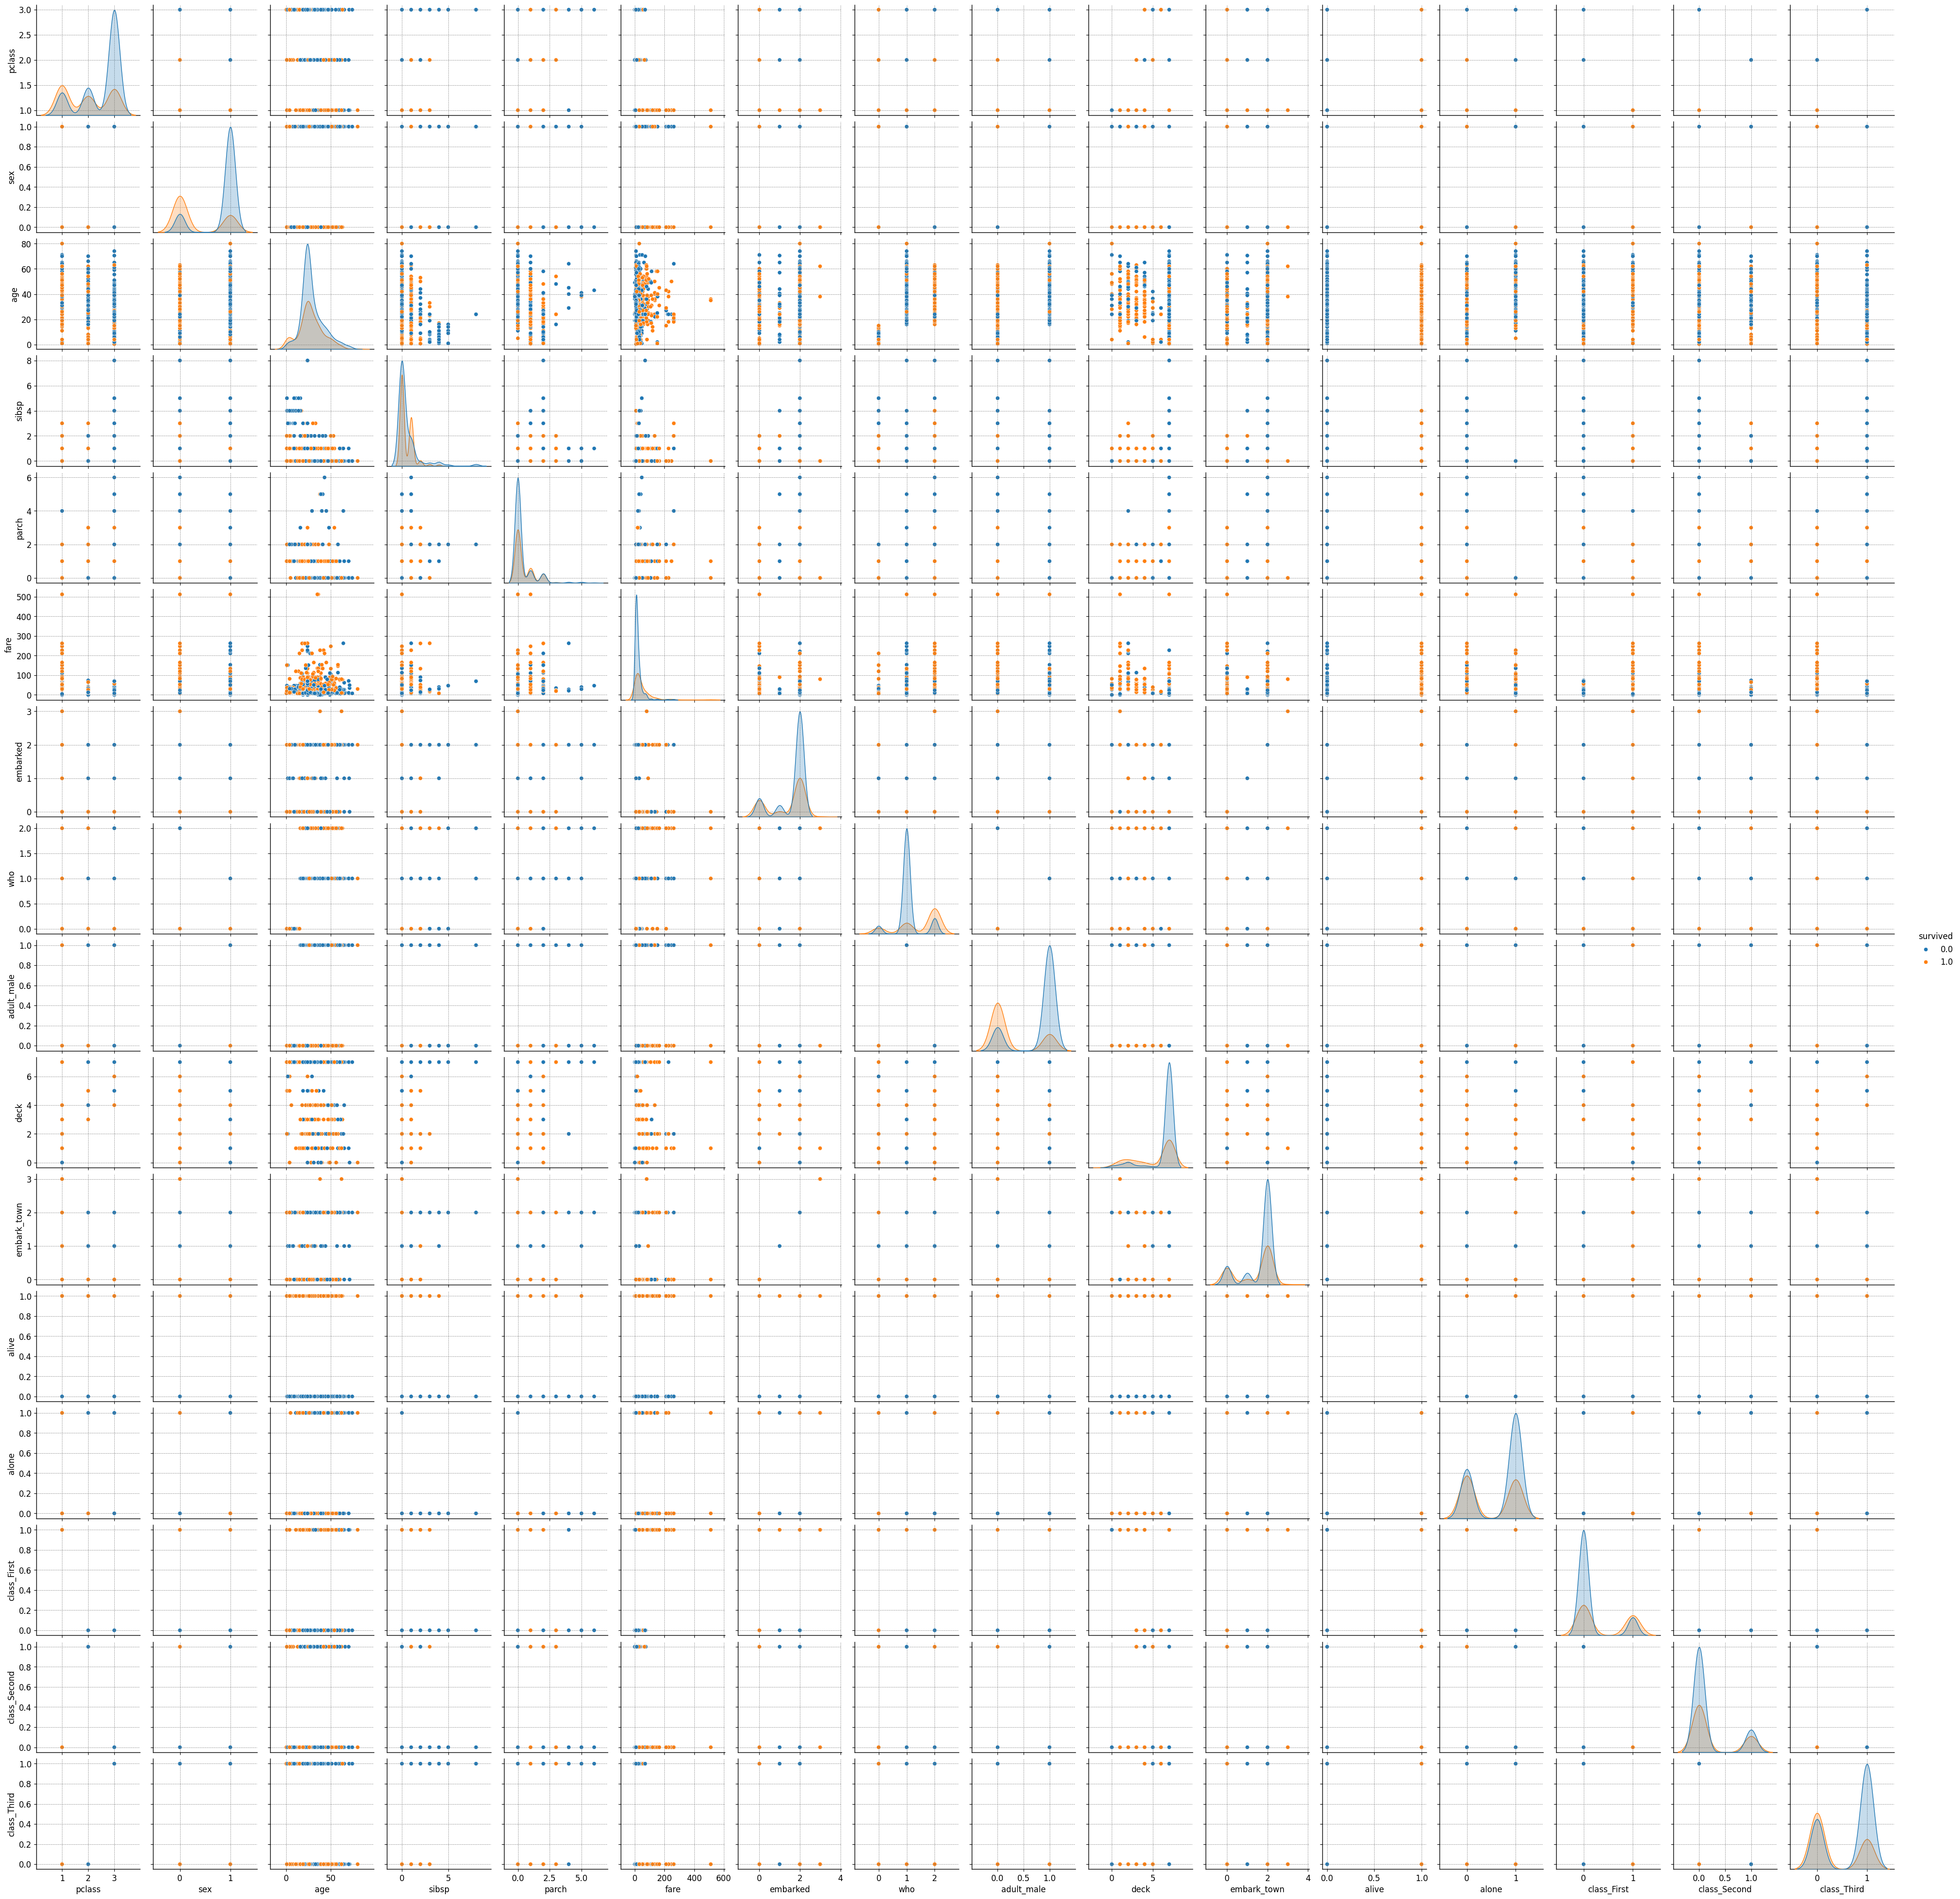

In [70]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(imputed_titanic_df, hue="survived")
plt.show()
